In [1]:
from QAE_module import *
from FCI_MATRIX_helper import *
from STATE_PREP_helper import *

In [2]:
from dwave.samplers import SimulatedAnnealingSampler
import sys, os
import numpy as np
import dimod
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from IPython.display import display
warnings.filterwarnings("ignore")

In [3]:
file_path = "C:/Users/prita/Desktop/DIRAC_FF_DATA/DIRAC_FF_DATA/SrF_finitefield_DATA/SrF_FF_0/SrF_FF_0/FCIDUMP"
# C:\Users\prita\Desktop\DIRAC_FF_DATA\DIRAC_FF_DATA\SrF_finitefield_DATA\SrF_FF_0.001\-0.001\FCIDUMP
# C:\Users\prita\Desktop\DIRAC_FF_DATA\DIRAC_FF_DATA\SrF_finitefield_DATA\SrF_FF_0\SrF_FF_0\FCIDUMP
integral_dict = read_integrals(file_path)


In [4]:
N_ORB = 8
N_ELEC = 3
N_alpha = 2
N_beta = 1

#State preparation for the perturbation -0.001 and +0.001
states  = generate_states(N_ORB, N_ELEC, N_alpha, N_beta)
print("Number of generated states:", len(states))
print("Generated states:")
for state in states:
    print(f'{states[0]} | {state} => Nexcite = {len(set(state) - set(states[0]))}')
    # discard the states with more than 2 excitations
    if len(set(state) - set(states[0])) > 2:
        states.remove(state)
print("Number of states after removing states with more than 2 excitations:", len(states))

Number of generated states: 24
Generated states:
[1, 2, 3] | [1, 2, 3] => Nexcite = 0
[1, 2, 3] | [1, 2, 5] => Nexcite = 1
[1, 2, 3] | [1, 2, 7] => Nexcite = 1
[1, 2, 3] | [1, 3, 4] => Nexcite = 1
[1, 2, 3] | [1, 3, 6] => Nexcite = 1
[1, 2, 3] | [1, 3, 8] => Nexcite = 1
[1, 2, 3] | [1, 4, 5] => Nexcite = 2
[1, 2, 3] | [1, 4, 7] => Nexcite = 2
[1, 2, 3] | [1, 5, 6] => Nexcite = 2
[1, 2, 3] | [1, 5, 8] => Nexcite = 2
[1, 2, 3] | [1, 6, 7] => Nexcite = 2
[1, 2, 3] | [1, 7, 8] => Nexcite = 2
[1, 2, 3] | [2, 3, 5] => Nexcite = 1
[1, 2, 3] | [2, 3, 7] => Nexcite = 1
[1, 2, 3] | [2, 5, 7] => Nexcite = 2
[1, 2, 3] | [3, 4, 5] => Nexcite = 2
[1, 2, 3] | [3, 4, 7] => Nexcite = 2
[1, 2, 3] | [3, 5, 6] => Nexcite = 2
[1, 2, 3] | [3, 5, 8] => Nexcite = 2
[1, 2, 3] | [3, 6, 7] => Nexcite = 2
[1, 2, 3] | [3, 7, 8] => Nexcite = 2
[1, 2, 3] | [4, 5, 7] => Nexcite = 3
[1, 2, 3] | [5, 7, 8] => Nexcite = 3
Number of states after removing states with more than 2 excitations: 22


In [5]:
# Convert the numpy array to a pandas DataFrame for better visualization
FCI_0= FCI_matrix(states, integral_dict)
FCI_0 = np.round(FCI_0, 10)
# write_FCI_matrix(FCI_min001, "FCI_min001.txt")
df_CI_matrix = pd.DataFrame(FCI_0)
print("CI matrix for lambda 0:")
display(df_CI_matrix)

CI matrix for lambda 0:


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.882902e+00,7.592916e-03,5.700000e-09,2.900045e-02,3.415191e-01,2.956000e-07,3.503220e-05,9.000000e-10,7.579466e-04,3.000000e-10,...,3.506153e-01,3.048000e-07,-3.000000e-10,-3.720398e-03,-2.300000e-09,5.140041e-02,-3.940000e-08,-3.940000e-08,-8.688934e-03,0.000000e+00
1,7.537737e-03,-1.763089e+00,8.130000e-08,9.026158e-03,-3.229652e-04,4.000000e-10,2.955424e-02,0.000000e+00,3.647443e-01,3.143000e-07,...,3.095812e-02,-2.000000e-10,3.094000e-07,4.934250e-03,0.000000e+00,3.720398e-03,-2.300000e-09,0.000000e+00,0.000000e+00,-3.940000e-08
2,5.700000e-09,7.610000e-08,-1.760918e+00,6.500000e-09,4.000000e-10,-1.000000e-10,-0.000000e+00,2.943310e-02,3.500000e-09,1.000000e-10,...,1.000000e-10,3.066371e-02,3.598507e-01,0.000000e+00,4.934250e-03,0.000000e+00,0.000000e+00,3.720398e-03,-2.300000e-09,5.140041e-02
3,-2.437055e-03,9.026158e-03,6.500000e-09,-1.692272e+00,2.330020e-03,3.800000e-09,7.012835e-03,7.300000e-09,4.038682e-02,-0.000000e+00,...,-4.201607e-03,-2.900000e-09,0.000000e+00,1.576413e-01,1.393000e-07,-7.579466e-04,4.000000e-10,-3.000000e-10,1.107866e-03,0.000000e+00
4,2.021447e-03,-3.229652e-04,4.000000e-10,2.274841e-03,-1.659123e+00,3.350000e-08,-3.711700e-06,-8.000000e-10,6.985246e-03,0.000000e+00,...,-5.132593e-02,-4.590000e-08,0.000000e+00,-3.229652e-04,-4.000000e-10,1.808665e-01,4.000000e-10,1.581000e-07,4.509746e-03,-3.000000e-10
5,8.000000e-10,4.000000e-10,-1.000000e-10,3.800000e-09,2.840000e-08,-1.697809e+00,8.000000e-10,1.200000e-09,4.000000e-10,7.562980e-03,...,4.590000e-08,-3.000000e-10,0.000000e+00,-4.000000e-10,-1.000000e-10,3.500000e-09,1.803910e-01,1.000000e-10,1.574000e-07,0.000000e+00
6,3.503220e-05,-1.883260e-03,-0.000000e+00,6.957656e-03,-3.711700e-06,8.000000e-10,-1.714403e+00,7.020000e-08,2.302430e-03,3.100000e-09,...,-4.524677e-04,0.000000e+00,-2.900000e-09,1.523937e-02,-2.000000e-10,3.503220e-05,-9.000000e-10,0.000000e+00,0.000000e+00,-3.000000e-10
7,9.000000e-10,0.000000e+00,-2.004398e-03,7.300000e-09,-8.000000e-10,1.200000e-09,6.500000e-08,-1.710194e+00,4.000000e-10,0.000000e+00,...,0.000000e+00,-4.524677e-04,-4.201607e-03,1.000000e-10,1.494496e-02,0.000000e+00,0.000000e+00,3.503220e-05,-9.000000e-10,-7.579466e-04
8,7.579466e-04,2.524665e-02,3.500000e-09,4.038682e-02,6.930067e-03,4.000000e-10,2.247251e-03,4.000000e-10,-1.552929e+00,3.490000e-08,...,-4.201607e-03,0.000000e+00,-4.590000e-08,-9.026158e-03,0.000000e+00,1.579316e-02,-0.000000e+00,-2.000000e-10,0.000000e+00,1.626000e-07
9,3.000000e-10,1.950000e-08,1.000000e-10,-0.000000e+00,0.000000e+00,7.507801e-03,3.100000e-09,0.000000e+00,2.970000e-08,-1.592328e+00,...,2.900000e-09,0.000000e+00,-3.000000e-10,6.500000e-09,0.000000e+00,0.000000e+00,1.567203e-02,0.000000e+00,-2.000000e-10,1.000000e-10


In [6]:
#qae
#Initial parameters for the QAE
#In this case I have chosen the lambda values around HF energy without neucler repulsion energy

# lam_min = -1.9
# lam_max = -1.7
resolution = 60
lam_min = -1.750
lam_max = -1.725
K = 10
H = FCI_0
sampler = SimulatedAnnealingSampler()
reference_ground_state = np.linalg.eigvalsh(H)[0]    
print("Reference ground state energy:", reference_ground_state)       
# file_name = "H2_FCI_QAE.txt"                            
scan_data = [[], [], [], []]
output_file_path = 'C:/Users/prita/Desktop/DIRAC_FCI/DIRAC_SrF_FCI_FF/SrF_FCI_QAE_0.txt'

Reference ground state energy: -1.8888720757278303


In [7]:
with open(output_file_path, 'w') as file:
    file.write('')
for idx, LAM in enumerate(np.linspace(lam_min, lam_max, resolution)):
    qubo_energy, qubo_solution = QAE(H, K, LAM, sampler)         
    QA_energies, QA_solutions = [], []
    

    wfn_coeff = get_coefficients(qubo_solution, K)
    energy = compute_energy(H, wfn_coeff)
    energy_functional = compute_energy_functional(H, wfn_coeff, LAM)
    error = abs(energy - reference_ground_state)/reference_ground_state

    
    with open(output_file_path, 'a') as file:
        file.write("Lambda: {:.5f}, Energy: {:.8f}, Error: {:.2E}, L: {:.8f}\n".format(LAM, energy, error, energy_functional))
    #print("Lambda: {:.5f}, Energy: {:.8f}, L: {:.8f}".format(LAM, energy, energy_functional))
    
    scan_data[0].append(LAM)
    scan_data[1].append(energy)
    scan_data[2].append(error)
    scan_data[3].append(energy_functional)
    



In [8]:
# scan_data[3]

In [9]:
min_energy_min001 = min(scan_data[1])
min_error = min(scan_data[2])

print(" Ground state energy from SA: {:.8f}".format(min_energy_min001))
print(" Ground state energy FCI: {:.8f}".format(reference_ground_state))
print(" Minimum error percentage: {:.6f}%".format(abs((min_energy_min001-reference_ground_state)/reference_ground_state*100)))

 Ground state energy from SA: -1.90904662
 Ground state energy FCI: -1.88887208
 Minimum error percentage: 1.068074%


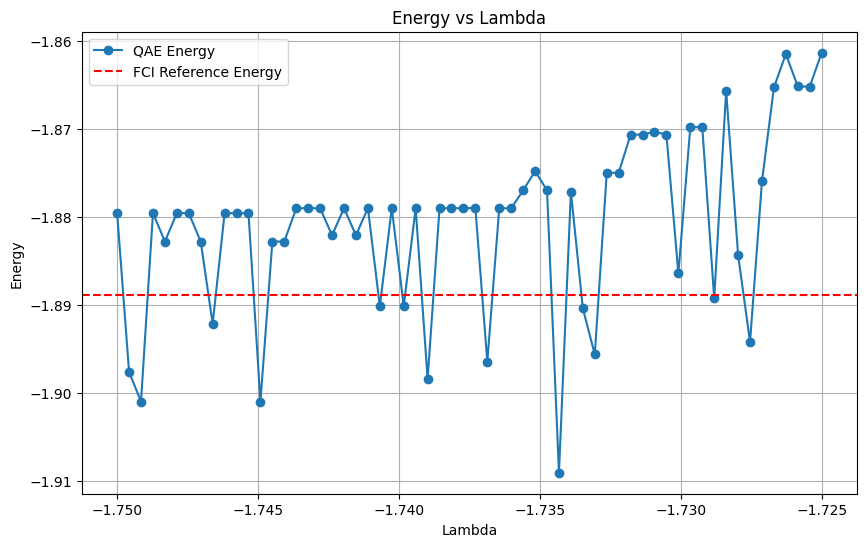

In [10]:
# Plotting energy vs lambda value
plt.figure(figsize=(10, 6))
plt.plot(scan_data[0], scan_data[1], label='QAE Energy', linestyle='-', marker='o')
plt.axhline(y=reference_ground_state, color='r', linestyle='--', label='FCI Reference Energy')
plt.xlabel('Lambda')
plt.ylabel('Energy')
plt.title('Energy vs Lambda')
plt.legend()
plt.grid(True)
plt.show()



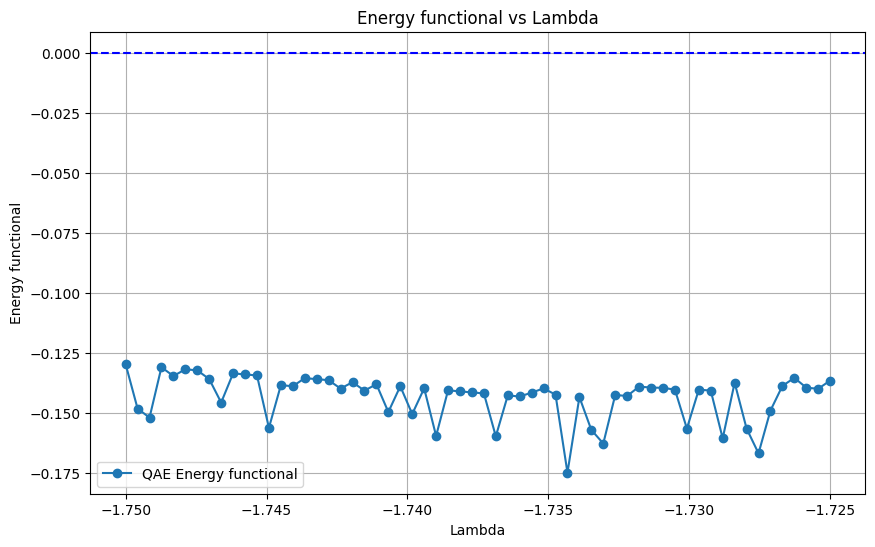

In [11]:
# Plotting energy vs lambda value
plt.figure(figsize=(10, 6))
plt.plot(scan_data[0], scan_data[3], label='QAE Energy functional', linestyle='-', marker='o')
plt.axhline(y=0.0, color='blue', linestyle='--')
plt.xlabel('Lambda')
plt.ylabel('Energy functional')
plt.title('Energy functional vs Lambda')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
0.025/30

0.0008333333333333334

In [13]:
0.1/1000

0.0001